In [24]:
import pandas as pd

bank_df = pd.read_csv('bank.csv') # csv has ; as delimiter
bank_df = pd.read_csv('bank.csv', sep=';')  # Specify the correct delimiter
bank_df.columns = [col.strip() for col in bank_df.columns]  # Remove leading/trailing whitespace from column names
bank_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [25]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         4521 non-null   int64 
 1   job         4521 non-null   object
 2   marital     4521 non-null   object
 3   education   4521 non-null   object
 4   default     4521 non-null   object
 5   balance     4521 non-null   int64 
 6   housing     4521 non-null   object
 7   loan        4521 non-null   object
 8   contact     4521 non-null   object
 9   day         4521 non-null   int64 
 10  month       4521 non-null   object
 11  duration    4521 non-null   int64 
 12  campaign    4521 non-null   int64 
 13  pdays       4521 non-null   int64 
 14  previous    4521 non-null   int64 
 15  poutcome    4521 non-null   object
 16  subscribed  4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [26]:
bank_df.subscribed.value_counts()

subscribed
no     4000
yes     521
Name: count, dtype: int64

In [27]:
## Importing resample from *sklearn.utils* package.
from sklearn.utils import resample

# Separate the case of yes-subscribes and no-subscribes
bank_subscribed_no = bank_df[bank_df.subscribed == 'no']
bank_subscribed_yes = bank_df[bank_df.subscribed == 'yes']

##Upsample the yes-subscribed cases.
df_minority_upsampled = resample(bank_subscribed_yes, 
                                 replace=True,     # sample with replacement
                                 n_samples=2000) 

# Combine majority class with upsampled minority class
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled])

In [32]:
from sklearn.utils import shuffle
new_bank_df = shuffle(new_bank_df)

new_bank_df.subscribed.value_counts()

subscribed
no     4000
yes    2000
Name: count, dtype: int64

In [33]:
# Assigning list of all column names in the DataFrame
X_features = list( new_bank_df.columns )
# Remove the response variable from the list
X_features.remove( 'subscribed' )
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [34]:
## get_dummies() will convert all the columns with data type as objects
encoded_bank_df = pd.get_dummies( new_bank_df[X_features], drop_first = True )
X = encoded_bank_df

In [35]:
# Encoding the subscribed column and assigning to Y
Y = new_bank_df.subscribed.map( lambda x: int( x == 'yes') )

In [36]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( X,
                                                    Y,
                                                    test_size = 0.3,
                                                    random_state = 42 )

In [37]:
## Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier

## Initializing the classifier
knn_clf = KNeighborsClassifier()
## Fitting the model with the training set
knn_clf.fit( train_X, train_y )

KNeighborsClassifier()

In [38]:
## Predicting on test set
pred_y = knn_clf.predict(test_X)

In [41]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn

def draw_cm(actual, predicted):
    # Compute the confusion matrix with labels specified explicitly
    cm = metrics.confusion_matrix(actual, predicted, labels=[1, 0])
    
    # Plot the confusion matrix as a heatmap
    sn.heatmap(cm, annot=True, fmt='.2f',
               xticklabels=["Subscribed", "Not Subscribed"],
               yticklabels=["Subscribed", "Not Subscribed"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

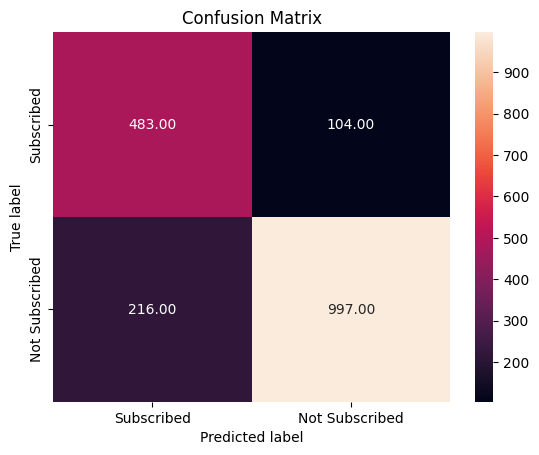

In [42]:
## Drawing the confusion matrix for KNN model 
draw_cm( test_y, pred_y )

In [43]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1213
           1       0.69      0.82      0.75       587

    accuracy                           0.82      1800
   macro avg       0.80      0.82      0.81      1800
weighted avg       0.84      0.82      0.83      1800

